# Proyek Analisis Data: Bike Sharing Dataser
- **Nama:** Fahira Adindiah
- **Email:** m010d4kx1699@bangkit.academy
- **ID Dicoding:** Fahira Adindiah M010D4KX1699

## Menentukan Pertanyaan Bisnis

- Musim dengan jumlah sewa tertinggi
- Hari dengan jumlah sewa tertinggi

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

In [4]:
df_day = pd.read_csv("dataset/day.csv")
df_hour = pd.read_csv("dataset/day.csv")

### Assessing Data

In [5]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_day.duplicated().sum()

0

In [8]:
df_hour.duplicated().sum()

0

In [9]:
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return len(outliers)

In [10]:
numeric_columns_hour = df_hour.select_dtypes(include=np.number).columns
numeric_columns_day = df_day.select_dtypes(include=np.number).columns

In [11]:
hour_outliers_count = {}
for col in numeric_columns_hour:
    outliers_count = find_outliers(df_hour[col])
    hour_outliers_count[col] = outliers_count

day_outliers_count = {}
for col in numeric_columns_day:
    outliers_count = find_outliers(df_day[col])
    day_outliers_count[col] = outliers_count

print("Hour Outliers Count:", hour_outliers_count)
print("Day Outliers Count:", day_outliers_count)

Hour Outliers Count: {'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}
Day Outliers Count: {'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}


### Cleaning Data

In [12]:
import numpy as np

def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return cleaned_data

def drop_outliers_per_column(df):
    numeric_columns = df.select_dtypes(include=np.number).columns
    cleaned_df = df.copy()
    for col in numeric_columns:
        cleaned_df = cleaned_df.loc[remove_outliers(cleaned_df[col]).index]
    return cleaned_df

cleaned_df_hour = drop_outliers_per_column(df_hour)
cleaned_df_day = drop_outliers_per_column(df_day)

## Exploratory Data Analysis (EDA)

In [13]:
cleaned_df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
unique,NaN,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.366412,NaN,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,NaN,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,NaN,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,NaN,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,NaN,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,NaN,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000


In [14]:
cleaned_df_day.groupby(by="season").cnt.count()

season
1    164
2    158
3    170
4    163
Name: cnt, dtype: int64

In [15]:
print("1:Springer, 2:Summer, 3:Fall, 4:Winter)")

1:Springer, 2:Summer, 3:Fall, 4:Winter)


In [16]:
cleaned_df_day.groupby(by="weekday").cnt.count()

weekday
0     87
1     87
2    102
3    102
4     99
5    100
6     78
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim dengan jumlah sewa tertinggi

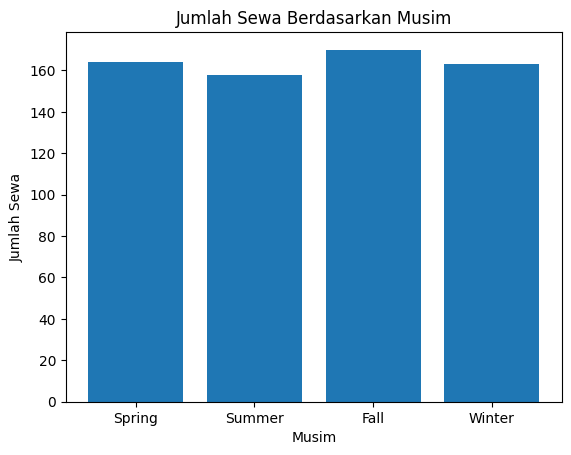

In [17]:
import matplotlib.pyplot as plt

season_counts = cleaned_df_day.groupby(by="season").cnt.count()
season_counts.index = season_counts.index.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

plt.bar(season_counts.index, season_counts)

plt.title('Jumlah Sewa Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')

plt.show()

### Pertanyaan 2: Hari dengan jumlah sewa tertinggi

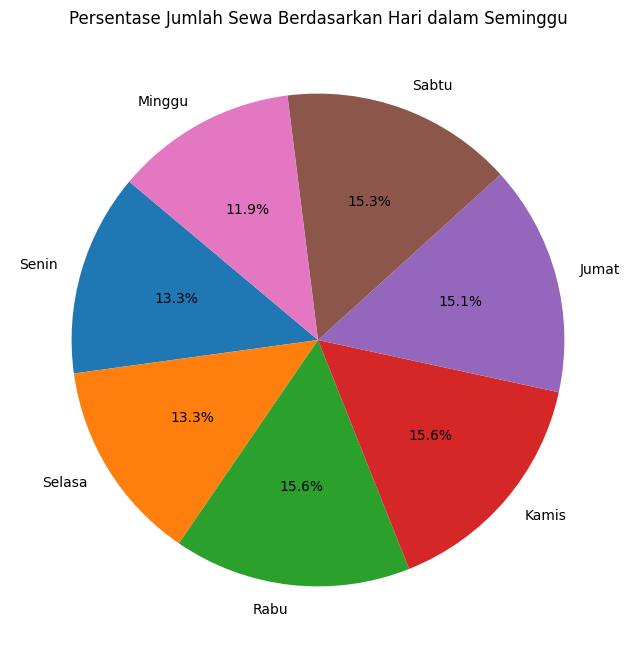

In [18]:
weekday_counts = cleaned_df_day.groupby(by="weekday").cnt.count()

plt.figure(figsize=(8, 8))
weekday_counts.index = weekday_counts.index.map({0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'})
plt.pie(weekday_counts, labels=weekday_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Persentase Jumlah Sewa Berdasarkan Hari dalam Seminggu')
plt.show()

## Conclusion

- Jumlah sewa harian tertinggi terjadi pada musim Fall (gugur)
- Jumlah sewa harian tertinggi terjadi pada Kamis atau Rabu